In [1]:
#https://github.com/zalandoresearch/fashion-mnist

### Loding and preparing the data the data 

In [2]:
# import needed libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier 


In [3]:
# reading the data to a DataFrame
data = pd.read_csv('fashionmnist/fashion-mnist_train.csv') 

In [4]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### the first column 'label' : numbers from 0 to 9, each number corresponds to an item
###### remaining 784 columns are the pixels that make up the images (gray scale images)

In [5]:
data.shape

(60000, 785)

###### total of 60 000 records
###### 784 pixels = 28x28 images + 1 column for item type (785 columns)

In [6]:
# I use 40% of the data only to train the model i don't take the whole dataset 
data = data.sample(frac = 0.4).reset_index(drop = True)
data.shape

(24000, 785)

In [7]:
# lookup table that muchs the numbers to the actual fashion items
LOOKUP = { 0: 'T_shirt',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

In [8]:
# function that display images
def display_image(features, actual_label):
    print('actual label:', LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [9]:
X = data[data.columns[1:]] #features are all columns except the first column 'label'
Y = data['label'] 

In [10]:
X.head() # features

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,...,20,7,0,29,57,1,6,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y.head() # label

0    4
1    6
2    5
3    0
4    6
Name: label, dtype: int64

In [12]:
X.loc[5].values[:100] # first 100 pixel at the image of index 5 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
Y.loc[5] # the label that image at index  5 corresponds to 

4

actual label: Ankle boot


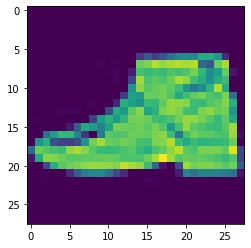

In [13]:
# we use the display image function 
display_image(X.loc[10].values, Y.loc[10])

In [14]:
# scale features to have values between 0 and 1  we devide all pixel values over 255
X = X/255.
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.003922,0.003922,0.0,0.000000,...,0.078431,0.027451,0.0,0.113725,0.223529,0.003922,0.023529,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.007843,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [16]:
# split data to train and test sets 
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [17]:
x_train.shape, y_train.shape

((19200, 784), (19200,))

In [18]:
 x_test.shape, y_test.shape

((4800, 784), (4800,))

In [19]:
# summary_classification function to print out accuaracy score 
def summary_classification (y_test,
                            y_pred,
                           avg_method = 'weighted'): 
    acc = accuracy_score(y_test,y_pred,normalize = True)
    num_acc = accuracy_score(y_test, y_pred, normalize = False) 
    prec = precision_score(y_test,y_pred,average = 'weighted')
    recall = recall_score(y_test,y_pred,average = 'weighted')
    print('test data count :', len(y_test))
    print('accuracy_count :', num_acc)
    print('accuracy_score :', acc)
    print('precision_score :', prec)
    print('recall_score :', recall)

In [21]:
# instantiante Logistic Regressor estimator 
# solver = 'sag'  to handle multinomial loss for multiclass classification
# multi_class ='auto' fit based on wether we perform bin classification or multiclass classification

LR_model = LogisticRegression(solver='sag',multi_class='auto', max_iter = 10000).fit(x_train,y_train)

In [22]:
y_pred = LR_model.predict(x_test)
y_pred

array([8, 7, 6, ..., 8, 2, 8], dtype=int64)

In [23]:
summary_classification(y_test,y_pred)

test data count : 4800
accuracy_count : 4107
accuracy_score : 0.855625
precision_score : 0.8555702790720312
recall_score : 0.855625
